## **1. Import Necessary Libraries**

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from scipy import stats
import scipy
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, date
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv('data_cleaned/Iowa_Liquor_Cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Invoice Number        object 
 1   Order Date            object 
 2   Store Number          int64  
 3   Store Name            object 
 4   County                object 
 5   Category Name         object 
 6   Vendor Name           object 
 7   Product Name          object 
 8   Pack                  int64  
 9   Bottle Volume (ml)    float64
 10  State Bottle Cost     float64
 11  State Bottle Retail   float64
 12  Bottles Sold          int64  
 13  Sale (Dollars)        float64
 14  Volume Sold (Liters)  float64
 15  Store Longitude       float64
 16  Store Latitude        float64
dtypes: float64(7), int64(3), object(7)
memory usage: 339.4+ MB


In [4]:
# Change type some features
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Pack'] = data['Pack'].astype('object')
data['Bottle Volume (ml)'] = data['Bottle Volume (ml)'].astype('object')
data['Store Longitude'] = data['Store Longitude'].astype('object')
data['Store Latitude'] = data['Store Latitude'].astype('object')

# Check types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Invoice Number        object        
 1   Order Date            datetime64[ns]
 2   Store Number          int64         
 3   Store Name            object        
 4   County                object        
 5   Category Name         object        
 6   Vendor Name           object        
 7   Product Name          object        
 8   Pack                  object        
 9   Bottle Volume (ml)    object        
 10  State Bottle Cost     float64       
 11  State Bottle Retail   float64       
 12  Bottles Sold          int64         
 13  Sale (Dollars)        float64       
 14  Volume Sold (Liters)  float64       
 15  Store Longitude       object        
 16  Store Latitude        object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(10)
memory usage: 339.4+ MB


In [5]:
data.head(3)

,Invoice Number,Order Date,Store Number,Store Name,County,Category Name,Vendor Name,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Longitude,Store Latitude
0,INV-54554500001,2023-01-02,5245,BEST TRIP,POLK,100% AGAVE TEQUILA,DIAGEO AMERICAS,CASAMIGOS REPOSADO 750.0 (ml),6,750.0,29.99,44.99,3,134.97,2.25,-93.61379,41.57608
1,INV-54554700023,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,POLK,MIXTO TEQUILA,PROXIMO,JOSE CUERVO ESPECIAL REPOSADO 200.0 (ml),48,200.0,3.63,5.45,48,261.60,9.60,-93.59738,41.55503
2,INV-54554700003,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,POLK,SCOTCH WHISKIES,DIAGEO AMERICAS,BUCHANAN DELUXE 12YR 750.0 (ml),12,750.0,20.99,31.49,12,377.88,9.00,-93.59738,41.55503


In [6]:
data.tail(3)

,Invoice Number,Order Date,Store Number,Store Name,County,Category Name,Vendor Name,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Longitude,Store Latitude
2616991,INV-65821000012,2023-12-30,2627,HY-VEE WINE & SPIRITS #1 / MLK,POLK,IMPORTED VODKAS,STOLI GROUP,STOLICHNAYA ELIT 750.0 (ml),6,750.0,24.99,37.49,6,224.94,4.5,-93.65088,41.62615
2616992,INV-65818800038,2023-12-30,5237,WORLD LIQUOR & TOBACCO + VAPE,IOWA,100% AGAVE TEQUILA,"MAST-JAGERMEISTER US, INC",TEREMANA BLANCO TEQUILA 750.0 (ml),6,750.0,15.91,23.87,6,143.22,4.5,-94.17794,42.51218
2616993,INV-65827100028,2023-12-30,4370,KUM & GO #240 / NORTH AVE NORWALK,WARREN,AMERICAN FLAVORED VODKA,E & J GALLO WINERY,NEW AMSTERDAM PINK WHITNEY 750.0 (ml),12,750.0,8.00,12.00,2,24.00,1.5,-93.68186,41.47536


In [7]:
data.columns

Index(['Invoice Number', 'Order Date', 'Store Number', 'Store Name', 'County',
       'Category Name', 'Vendor Name', 'Product Name', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Store Longitude', 'Store Latitude'],
      dtype='object')

In [8]:
# Create RFM colors
RFM_color = ['#CAECFB', '#68DFC4', '#07B3B2', '#005A74']
sb.color_palette(RFM_color)

[(0.792156862745098, 0.9254901960784314, 0.984313725490196),
 (0.40784313725490196, 0.8745098039215686, 0.7686274509803922),
 (0.027450980392156862, 0.7019607843137254, 0.6980392156862745),
 (0.0, 0.35294117647058826, 0.4549019607843137)]

## **2. Customer Segmentation Using RFM**

### Calculate RFM

`Recency`

In [9]:
# Assign the current date (the date of performing the task) to be February 18, 2024.
now = date(2024,1,1)

# Group by Customers and check last date of purchase
recency = data.groupby( by = 'Store Number')['Order Date'].max().reset_index()

# Change the data type of 'Order Date' and then rename the column.
recency['Order Date'] = pd.DatetimeIndex(recency['Order Date']).date
recency = recency.rename(columns = {'Order Date' : 'Last Purchase Date'})

# Calculate recency
recency['Recency'] = recency['Last Purchase Date'].apply(lambda x: (now - x).days)
recency.drop('Last Purchase Date', axis = 1, inplace = True)

# Print dataframe
recency

,Store Number,Recency
0,2106,3
1,2130,3
2,2190,3
3,2191,4
4,2200,6
...,...,...
2082,10313,10
2083,10314,19
2084,10315,6
2085,10316,2


`Frequency`

In [10]:
# Group Customers by Invoice
frequency = data.groupby(by = 'Store Number')['Invoice Number'].count().reset_index()
frequency = frequency.rename(columns = {'Invoice Number' : 'Frequency'})
frequency

,Store Number,Frequency
0,2106,3261
1,2130,3211
2,2190,32002
3,2191,6779
4,2200,3516
...,...,...
2082,10313,27
2083,10314,110
2084,10315,53
2085,10316,26


`Monetary`

In [11]:
# Group Customers by Revenue
monetary = data.groupby('Store Number')['Sale (Dollars)'].sum().reset_index()
monetary = monetary.rename(columns = {'Sale (Dollars)' : 'Monetary'})
monetary

,Store Number,Monetary
0,2106,860027.88
1,2130,1615285.89
2,2190,15959622.42
3,2191,1503342.17
4,2200,319026.44
...,...,...
2082,10313,9692.60
2083,10314,12660.03
2084,10315,9815.29
2085,10316,3085.87


`Create RFM Table`

In [12]:
rfm = recency.merge(frequency, on = 'Store Number')
rfm = rfm.merge(monetary, on = 'Store Number')
rfm

,Store Number,Recency,Frequency,Monetary
0,2106,3,3261,860027.88
1,2130,3,3211,1615285.89
2,2190,3,32002,15959622.42
3,2191,4,6779,1503342.17
4,2200,6,3516,319026.44
...,...,...,...,...
2082,10313,10,27,9692.60
2083,10314,19,110,12660.03
2084,10315,6,53,9815.29
2085,10316,2,26,3085.87


### Summary About RFM

In [13]:
def univariate_analysis_continuous_variable(df, feature):
    print("Describe:")
    print(feature.describe(include = 'all'))
    print("Mode:", feature.mode())
    print("Range:", feature.values.ptp())
    print("IQR:", scipy.stats.iqr(feature))
    print("Var:", feature.var())
    print("Skew:", feature.skew())
    print("Kurtosis:", feature.kurtosis())

In [14]:
def univariate_visualization_analysis_continuous_variable(df,feature):
    sb.set()
    fig, (ax0, ax1) = plt.subplots(1,2, figsize = (15,5) )  
    sb.distplot(feature, ax= ax0, color= "#005A74")
    sb.boxplot(data= df, x = feature, ax = ax1, color= "#005A74")
    plt.show()

In [15]:
#Number of upper, lower outliers
def check_outlier(df, feature):
    # sb.boxplot(data = df, y = feature)
    # plt.show()
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    n_O_upper = df[feature > (Q3 + 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of upper outliers:", n_O_upper)
    n_L_upper = df[feature < (Q1 - 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of lower outliers:", n_L_upper)
    #Percentage of outliers
    outliers_per = round(((n_O_upper + n_L_upper)/df.shape[0])*100,0)
    print("Percentage of outliers:", outliers_per,"%")
    return  n_O_upper, n_L_upper, outliers_per

Feature: Recency


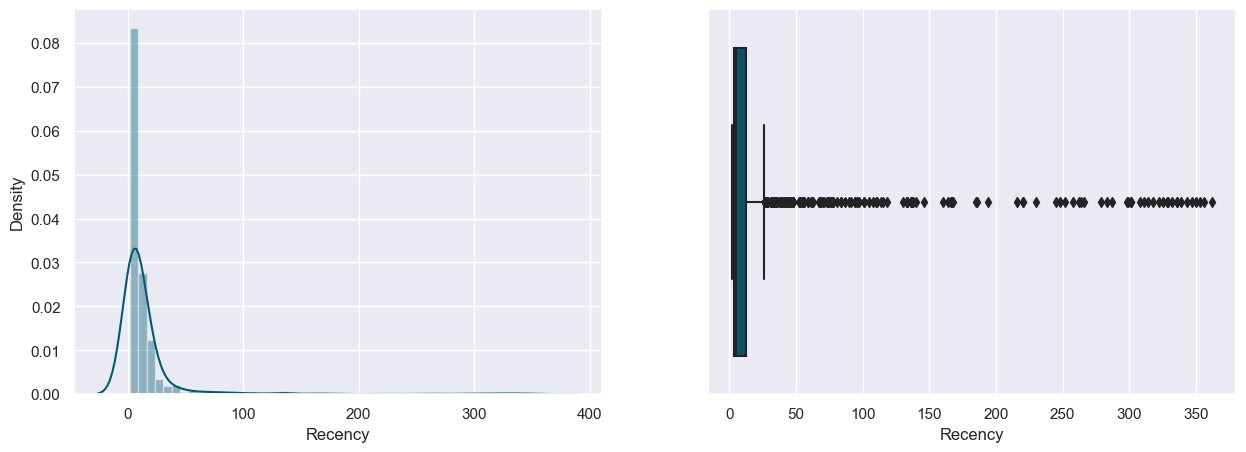

Describe:
count    2087.000000
mean       17.305223
std        42.854626
min         2.000000
25%         4.000000
50%         5.000000
75%        13.000000
max       362.000000
Name: Recency, dtype: float64
Mode: 0    5
Name: Recency, dtype: int64
Range: 360
IQR: 9.0
Var: 1836.5189707916559
Skew: 5.6372084687066
Kurtosis: 34.55885086199966
Number of upper outliers: 210
Number of lower outliers: 0
Percentage of outliers: 10.0 %


************************************************************ 

Feature: Frequency


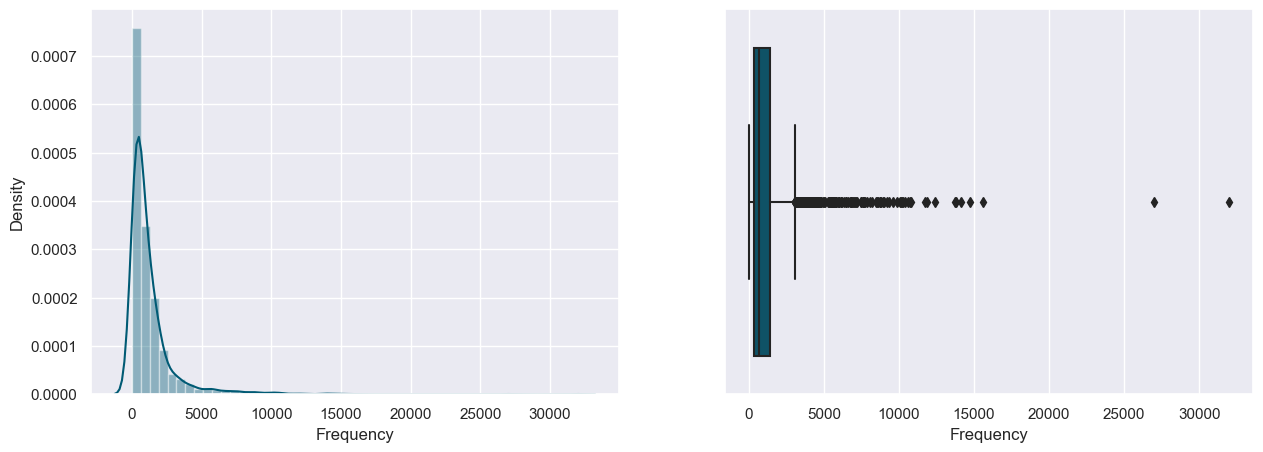

Describe:
count     2087.000000
mean      1253.950168
std       1890.967190
min          1.000000
25%        338.500000
50%        669.000000
75%       1425.000000
max      32002.000000
Name: Frequency, dtype: float64
Mode: 0    340
Name: Frequency, dtype: int64
Range: 32001
IQR: 1086.5
Var: 3575756.915061094
Skew: 5.806534948449507
Kurtosis: 59.89615097900715
Number of upper outliers: 176
Number of lower outliers: 0
Percentage of outliers: 8.0 %


************************************************************ 

Feature: Monetary


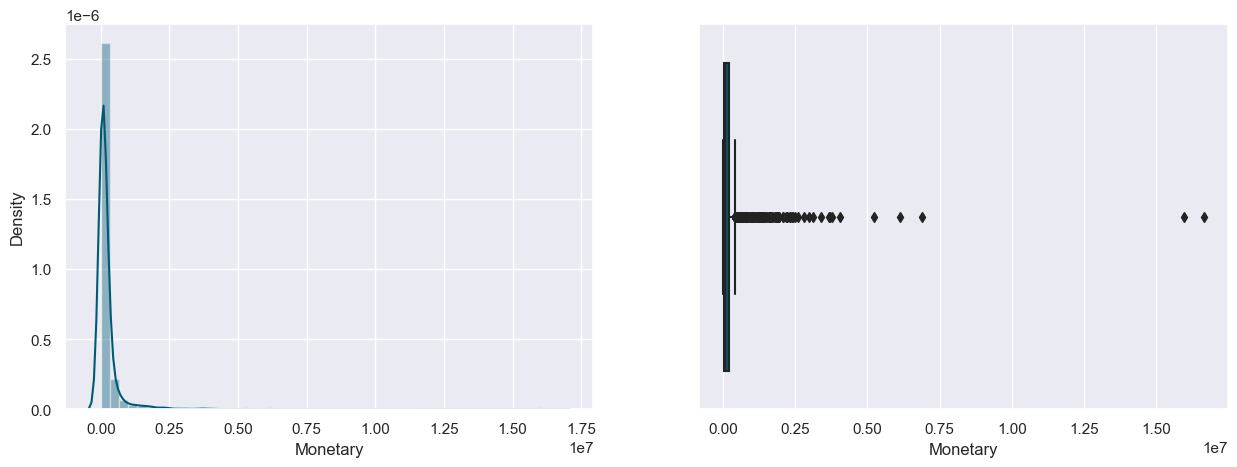

Describe:
count    2.087000e+03
mean     2.126226e+05
std      6.583956e+05
min      1.575000e+01
25%      3.934853e+04
50%      7.222898e+04
75%      1.846143e+05
max      1.664379e+07
Name: Monetary, dtype: float64
Mode: 0     2296.32
1    35115.96
2    79303.66
Name: Monetary, dtype: float64
Range: 16643775.87
IQR: 145265.77
Var: 433484721020.8997
Skew: 15.929399571825655
Kurtosis: 354.00538592440387
Number of upper outliers: 206
Number of lower outliers: 0
Percentage of outliers: 10.0 %


************************************************************ 



In [16]:
for col in rfm.columns[1:]:
    print('Feature:', col)
    univariate_visualization_analysis_continuous_variable(rfm, rfm[col])
    univariate_analysis_continuous_variable(rfm, rfm[col])
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm, rfm[col])
    print('\n')
    print('*' * 60 ,'\n')

`Comment:`  
- We have some problems:
    - `Recency` distribution is right-skewed.
    - `Frequency` distribution is right-skewed.
    - `Monetary` distribution is left-skewed and leptokurtic.  
    -  There are relatively many outliers in all three variables above.
  => All three fields do not follow a normal distribution of data. It is necesssary to transformation data before using K-mean.  



- Some method for transformation 
    - `log` transformation.
    - `square root` transformation.
    - `box-cox` transformation.
    - `cube root` tranformation.a:   tion..

### Feature Engineering

In [17]:
def analyze_skewness(x):
    fig, ax = plt.subplots(1,5, figsize=(10,5))
    sb.distplot(rfm[x], ax=ax[0], color= "#005A74")
    sb.distplot(np.log(rfm[x]), ax=ax[1], color= "#005A74")
    sb.distplot(np.sqrt(rfm[x]), ax=ax[2], color= "#005A74")
    sb.distplot(stats.boxcox(rfm[x])[0], ax=ax[3], color= "#005A74")
    sb.distplot(np.cbrt(rfm[x]), ax=ax[4], color= "#005A74") 
    plt.tight_layout()
    plt.show()
    #Print result 
    print("Original Skewness:", rfm[x].skew().round(2))
    print("Log-transformed Skewness:", np.log(rfm[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(rfm[x]).skew().round(2))
    print("Box-Cox transformed Skewness:", pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    print("Cube Root-transformed Skewness:", pd.Series(np.cbrt(rfm[x])).skew().round(2))


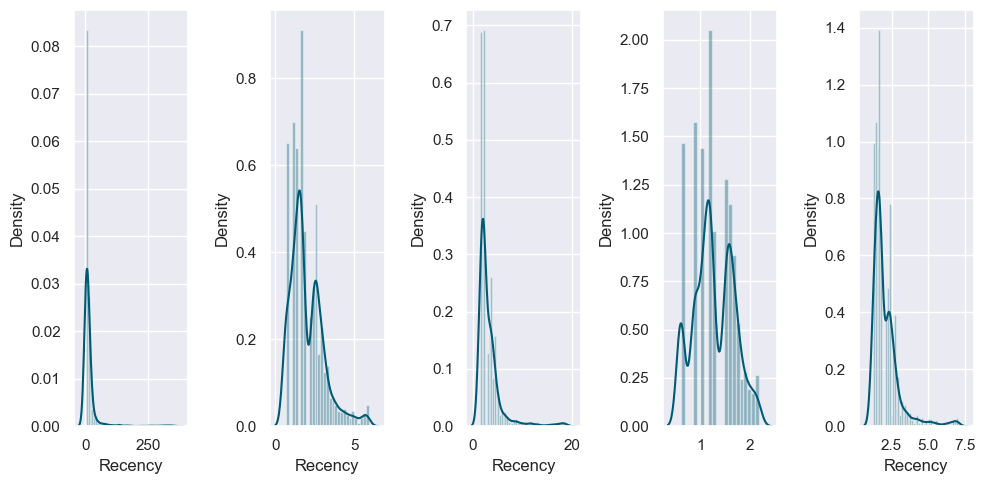

Original Skewness: 5.64
Log-transformed Skewness: 1.19
Square Root-transformed Skewness: 3.49
Box-Cox transformed Skewness: 0.12
Cube Root-transformed Skewness: 2.64


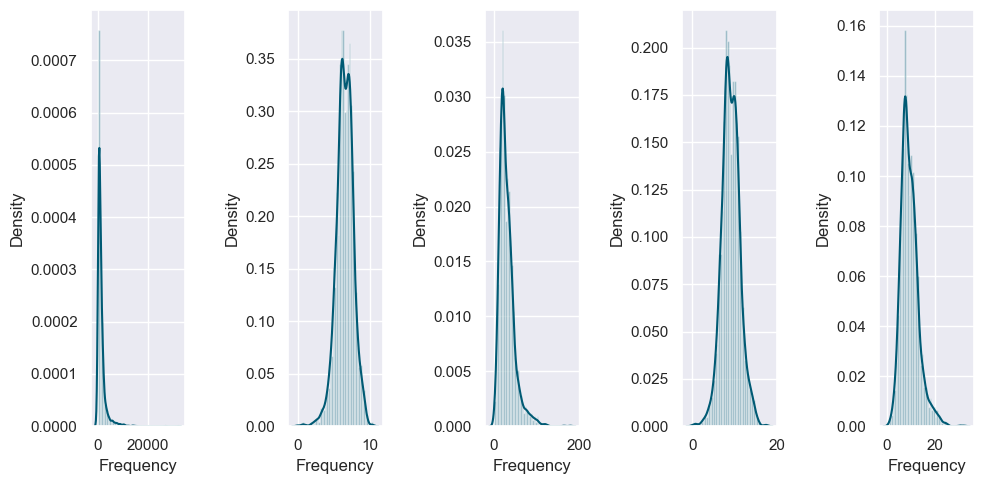

Original Skewness: 5.81
Log-transformed Skewness: -0.47
Square Root-transformed Skewness: 1.91
Box-Cox transformed Skewness: 0.03
Cube Root-transformed Skewness: 1.11


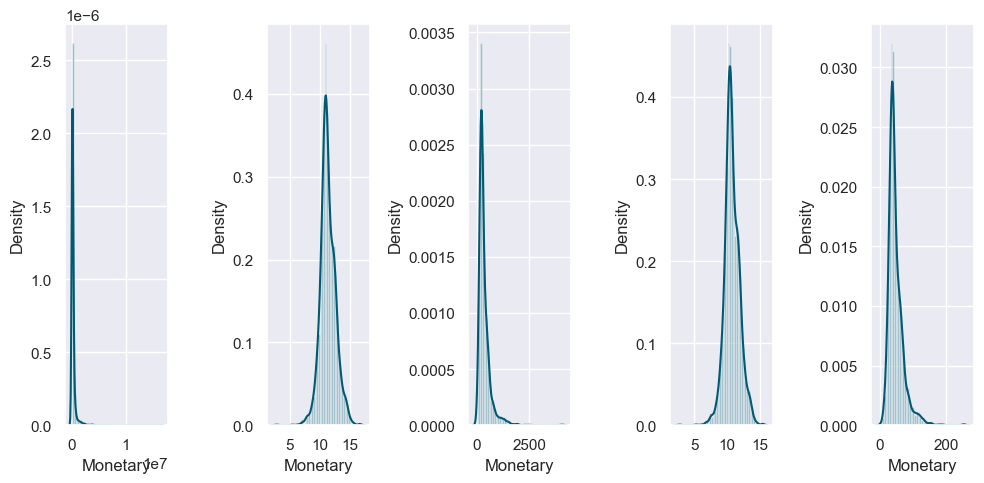

Original Skewness: 15.93
Log-transformed Skewness: 0.06
Square Root-transformed Skewness: 4.07
Box-Cox transformed Skewness: -0.01
Cube Root-transformed Skewness: 2.29


In [18]:
for col in rfm.columns[1:]:
    analyze_skewness(col)

`Comment:`  
All data fields are well-suited for Box-Cox transformation as the Box-Cox values are closest to zero.

`Create a new dataframe by rfm dataframe with boxcox`

In [19]:
rfm_bc = pd.DataFrame()
# Tranform Recency to box-cox transformation
rfm_bc['Recency'] = stats.boxcox(rfm['Recency'])[0]

# Tranform Frequency to box-cox transformation
rfm_bc['Frequency'] = stats.boxcox(rfm['Frequency'])[0]

# Tranform Monetary to box-cox transformation
rfm_bc['Monetary'] = stats.boxcox(rfm['Monetary'])[0]

# Check new dataframe
rfm_bc

,Recency,Frequency,Monetary
0,0.881613,12.142587,12.889473
1,0.881613,12.109445,13.448115
2,0.881613,17.613385,15.452839
3,1.053191,13.768938,13.384612
4,1.262639,12.304774,12.004354
...,...,...,...
2082,1.480831,3.866269,8.824831
2083,1.696724,5.916651,9.071285
2084,1.262639,4.816886,8.836451
2085,0.602075,3.814843,7.762260


`Scaler Data`

In [20]:
# Using StandardScaler
scaler = SklearnTransformerWrapper(transformer = StandardScaler())
scaler.fit(rfm_bc)
rfm_scaler = scaler.transform(rfm_bc)
rfm_scaler

,Recency,Frequency,Monetary
0,-0.961115,1.420018,1.825576
1,-0.961115,1.404591,2.309558
2,-0.961115,3.966642,4.046363
3,-0.538735,2.177075,2.254542
4,-0.023128,1.495515,1.058747
...,...,...,...
2082,0.514003,-2.432558,-1.695850
2083,1.045474,-1.478118,-1.482333
2084,-0.023128,-1.990052,-1.685784
2085,-1.649262,-2.456497,-2.616415


`Summary RFM data when using Standard Scaler`

Feature: Recency


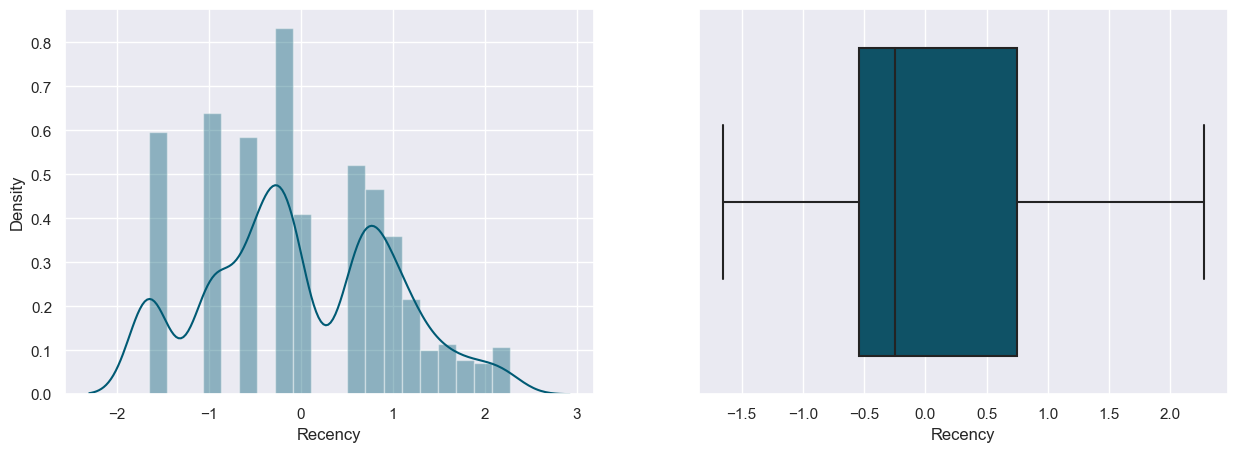

Describe:
count    2.087000e+03
mean     6.809226e-17
std      1.000240e+00
min     -1.649262e+00
25%     -5.387348e-01
50%     -2.442403e-01
75%      7.485279e-01
max      2.271578e+00
Name: Recency, dtype: float64
Mode: 0   -0.24424
Name: Recency, dtype: float64
Range: 3.920839953751803
IQR: 1.2872626657542023
Var: 1.0004793863854269
Skew: 0.11573497273049069
Kurtosis: -0.7281343786489543
Number of upper outliers: 0
Number of lower outliers: 0
Percentage of outliers: 0.0 %


************************************************************ 

Feature: Frequency


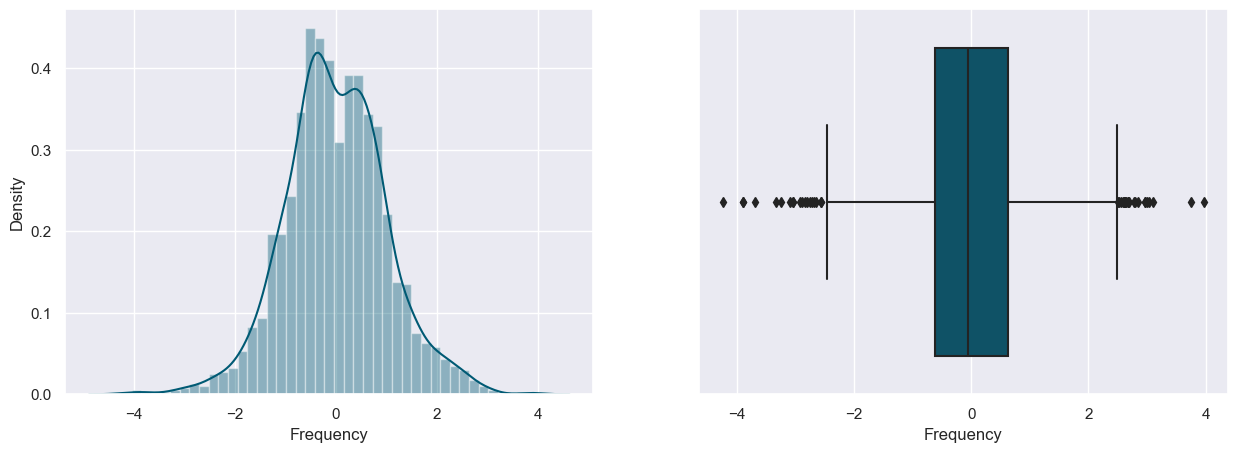

Describe:
count    2.087000e+03
mean    -5.447381e-17
std      1.000240e+00
min     -4.232283e+00
25%     -6.177239e-01
50%     -5.003082e-02
75%      6.243309e-01
max      3.966642e+00
Name: Frequency, dtype: float64
Mode: 0   -0.614155
Name: Frequency, dtype: float64
Range: 8.198924820670284
IQR: 1.2420547873604173
Var: 1.0004793863854267
Skew: 0.02942008568071504
Kurtosis: 0.7412036491796687
Number of upper outliers: 22
Number of lower outliers: 19
Percentage of outliers: 2.0 %


************************************************************ 

Feature: Monetary


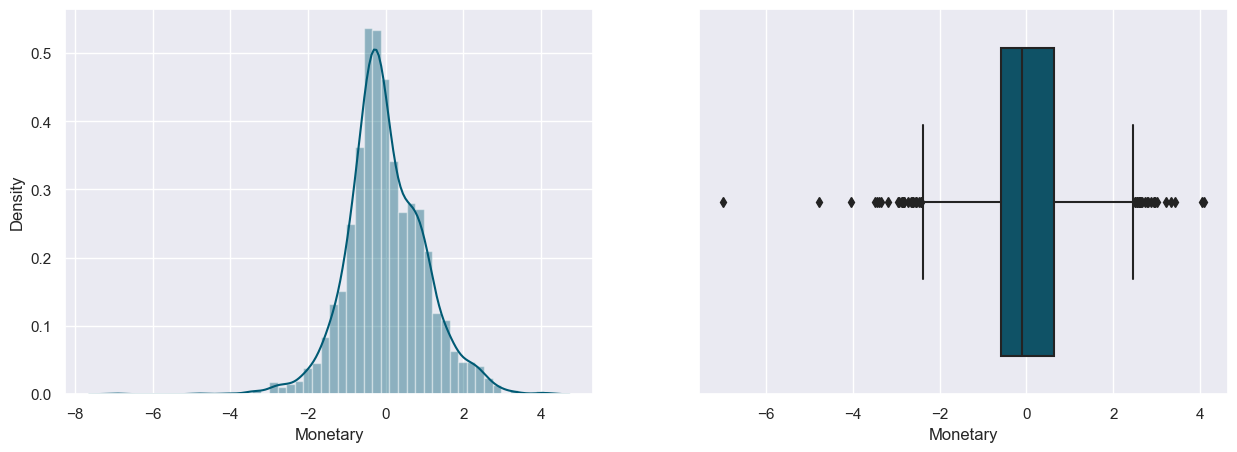

Describe:
count    2.087000e+03
mean    -8.715809e-16
std      1.000240e+00
min     -6.981088e+00
25%     -5.812494e-01
50%     -1.022212e-01
75%      6.329556e-01
max      4.077871e+00
Name: Monetary, dtype: float64
Mode: 0   -2.855592
1   -0.671269
2   -0.028749
Name: Monetary, dtype: float64
Range: 11.058958913885434
IQR: 1.214205019413774
Var: 1.0004793863854267
Skew: -0.007359426206297884
Kurtosis: 2.0571542122754636
Number of upper outliers: 25
Number of lower outliers: 27
Percentage of outliers: 2.0 %


************************************************************ 



In [21]:
for col in rfm.columns[1:]:
    print('Feature:', col)
    univariate_visualization_analysis_continuous_variable(rfm_scaler, rfm_scaler[col])
    univariate_analysis_continuous_variable(rfm_scaler, rfm_scaler[col])
    n_O_upper, n_L_upper, outliers_per = check_outlier(rfm_scaler, rfm_scaler[col])
    print('\n')
    print('*' * 60 ,'\n')

`Comment:`  
- After applying the `Standard Scaler`, the distributions of the three variables appear to be close to normal distributions.    
- Additionally, the proportion of outliers in the variables has significantly decreased.

=> Hence, it is possible to proceed with using an algorithm to segment customers.

### Using K-Mean to Clustering

`Using Elbow Method`

In [22]:
# Loop from 2 to 10 clusters and monitor the WSSE (within cluster sum of squares)
wsse_list = []
K_range = range(2, 11)

for k in K_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    model.fit(rfm_scaler)

    # Append the inertia to the list of inertias
    wsse_list.append(model.inertia_)

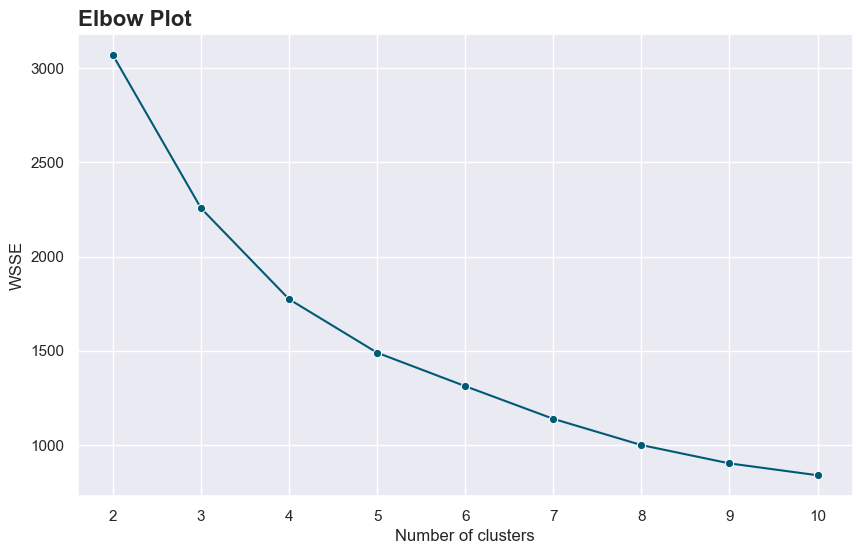

In [23]:
# Visualize the elbow plot
plt.figure(figsize=(10, 6))
sb.lineplot(x=K_range, y=wsse_list, marker='o', color= "#005A74")
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow Plot',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.show();

`Comment:`  
The elbow method might not be very helpful in this situation, but looking at the overall picture, we can make a preliminary choice with 3 or 4 clusters for the problem.  
Let's try with Hierarchical Clustering to have a better insight.




`Using Hierarchical Clustering`

In [24]:
# Calculate the linkage
linkage_matrix = linkage(rfm_scaler, method = 'ward', metric= 'euclidean')

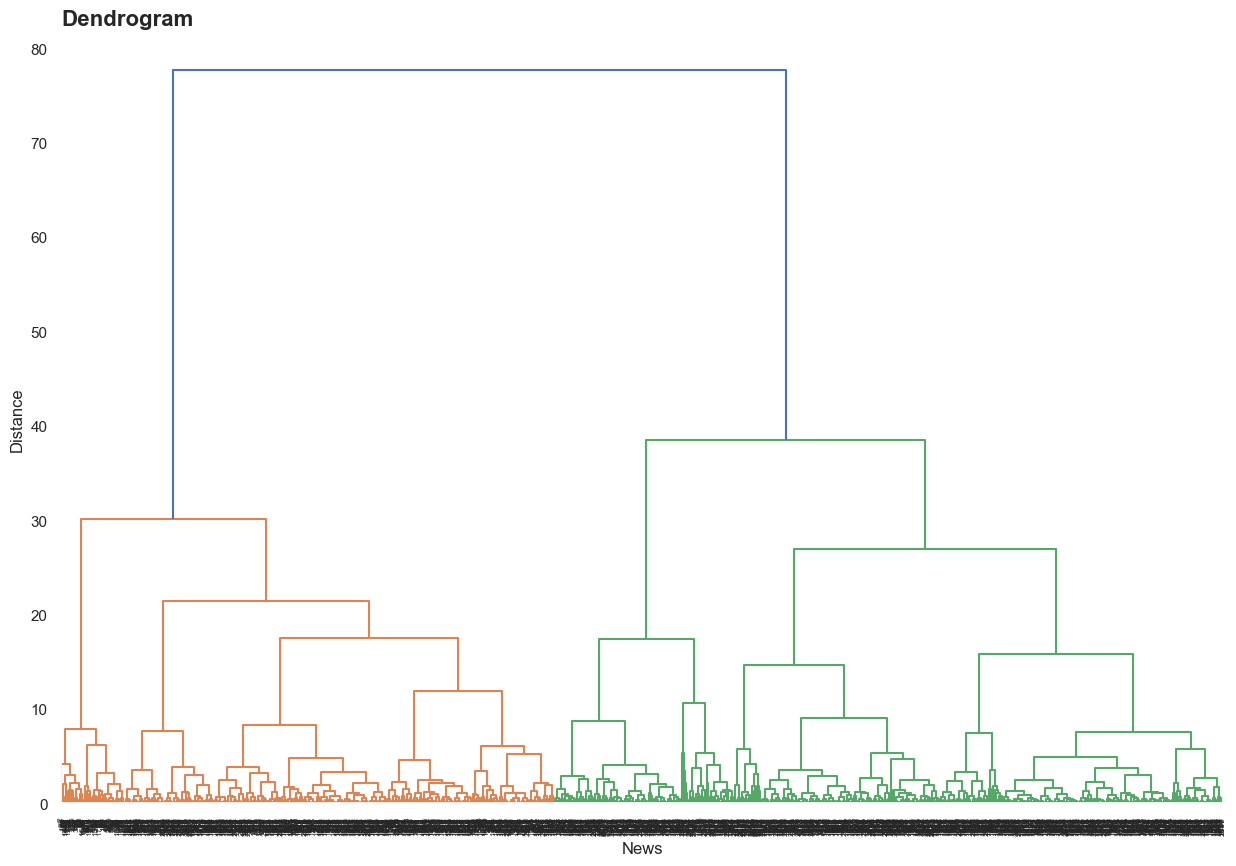

In [25]:
# Plot the dendrogram
plt.figure(figsize = (15, 10))
dendrogram(linkage_matrix, leaf_rotation= 90, leaf_font_size= 6)
plt.title('Dendrogram',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('News')
plt.ylabel('Distance')
plt.show();

`Comment:`  
The dendrogram provides a clearer view of how the data is clustered and somewhat reinforces the choice between 3 or 4 clusters from the previous method.  
Let's try another approach by using Silhouette Scores.

`Using Silhouette Method`

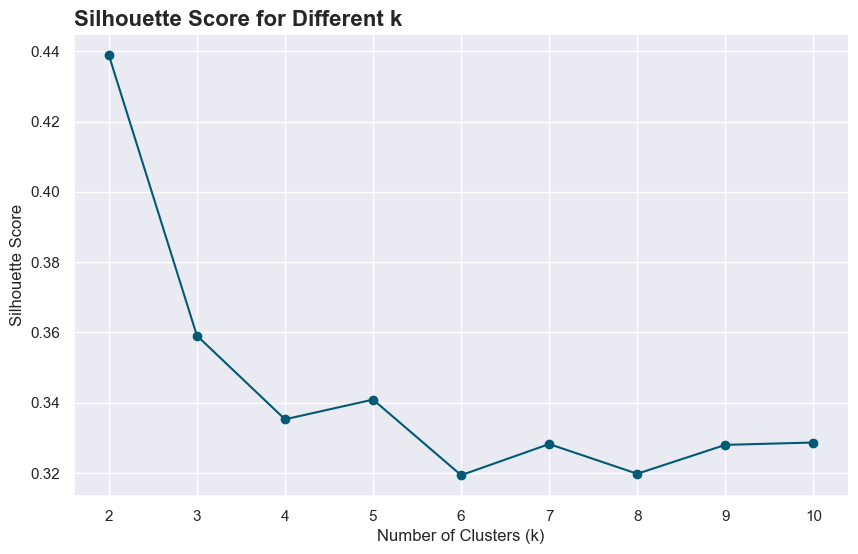

Best k value based on Silhouette Score: 2


In [26]:
silhouette_scores = []
possible_k_values = range(2, 11)  # k from 2 to 10
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaler)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_scaler, labels))

# Visualize Silhouette Score for each k value
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o', color= "#005A74")
plt.title('Silhouette Score for Different k',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Choose the best k
best_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"Best k value based on Silhouette Score: {best_k}")

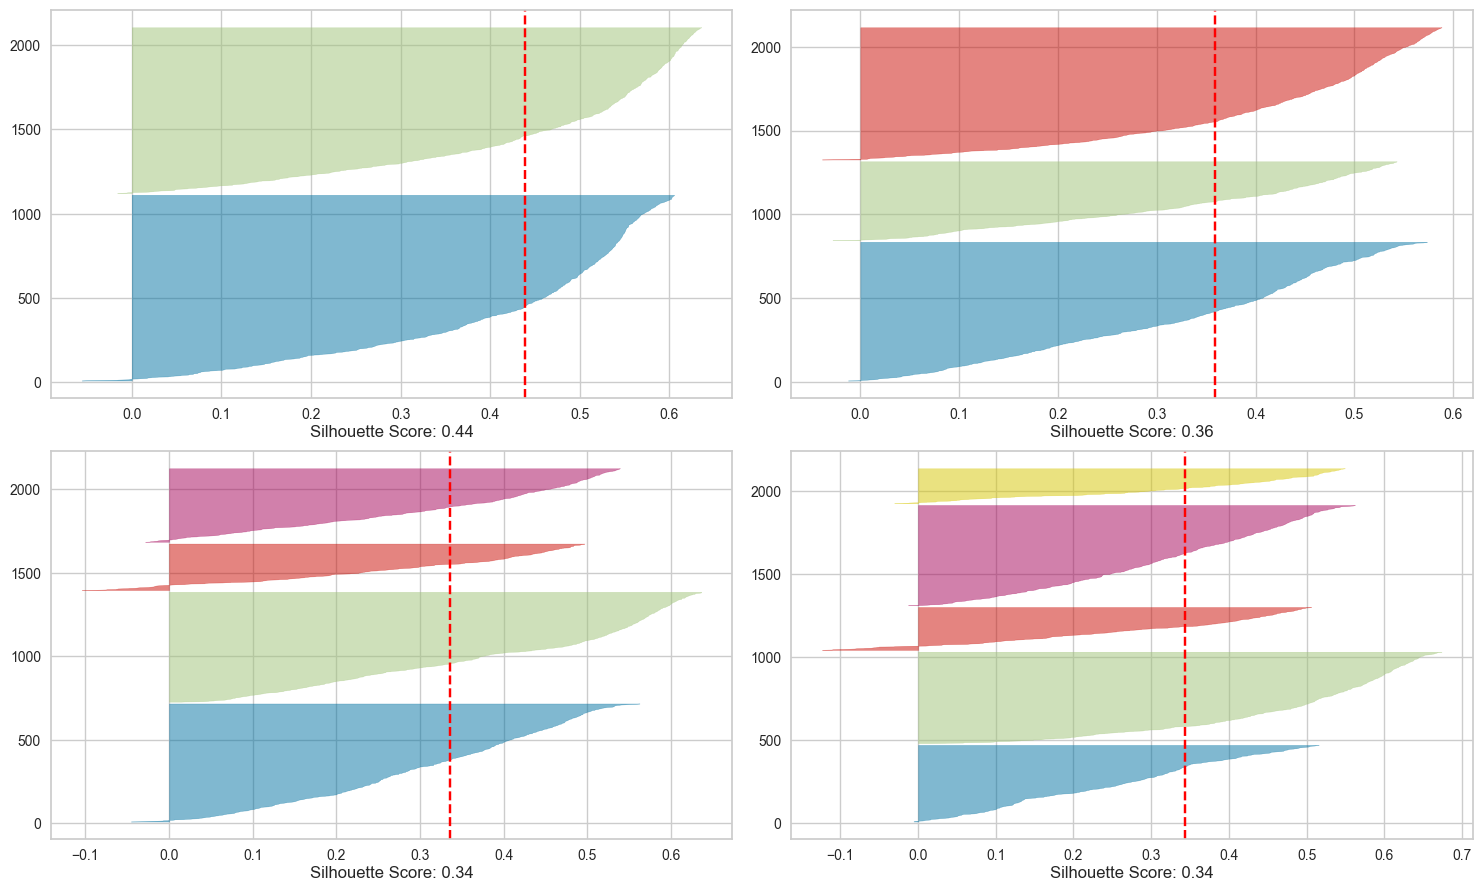

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
# Visualize
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
for idx, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(rfm_scaler)
    ax[q][mod].text(0.5, -0.1, f'Silhouette Score: {np.mean(visualizer.silhouette_score_):.2f}', size=12, ha='center', transform=ax[q][mod].transAxes)
plt.tight_layout()
plt.show()

`Conclusion:`   
- In all three methods, we will not choose k = 2. Although the Silhouette Score indicates that k = 2 has the highest score, when looking at the Silhouette Chart at k = 2, the density of data within each cluster is relatively high. While the score and the consistency between clusters are reasonable, we need more than 2 customer groups in this problem to identify more detailed characteristics of each group, facilitating effective planning for the upcoming year.
- For the Hierarchical Clustering method, we can more clearly determine the number of clusters, which are 3 and 4.
- Finally, to make a decision based on the two points above after eliminating k = 2 and narrowing down the clusters to 3 and 4, we observe that the Silhouette Score at k = 3 is higher than the other clusters. However, after going through some detailed testing processes such as the number of customers in each cluster, the characteristics of the centroids of each cluster, k = 4 provides the optimal result among the mentioned clusters.

Therefore, by combining the three clustering methods as above, I choose k = 4.

`Choose k = 4 and fit it with scaler data`

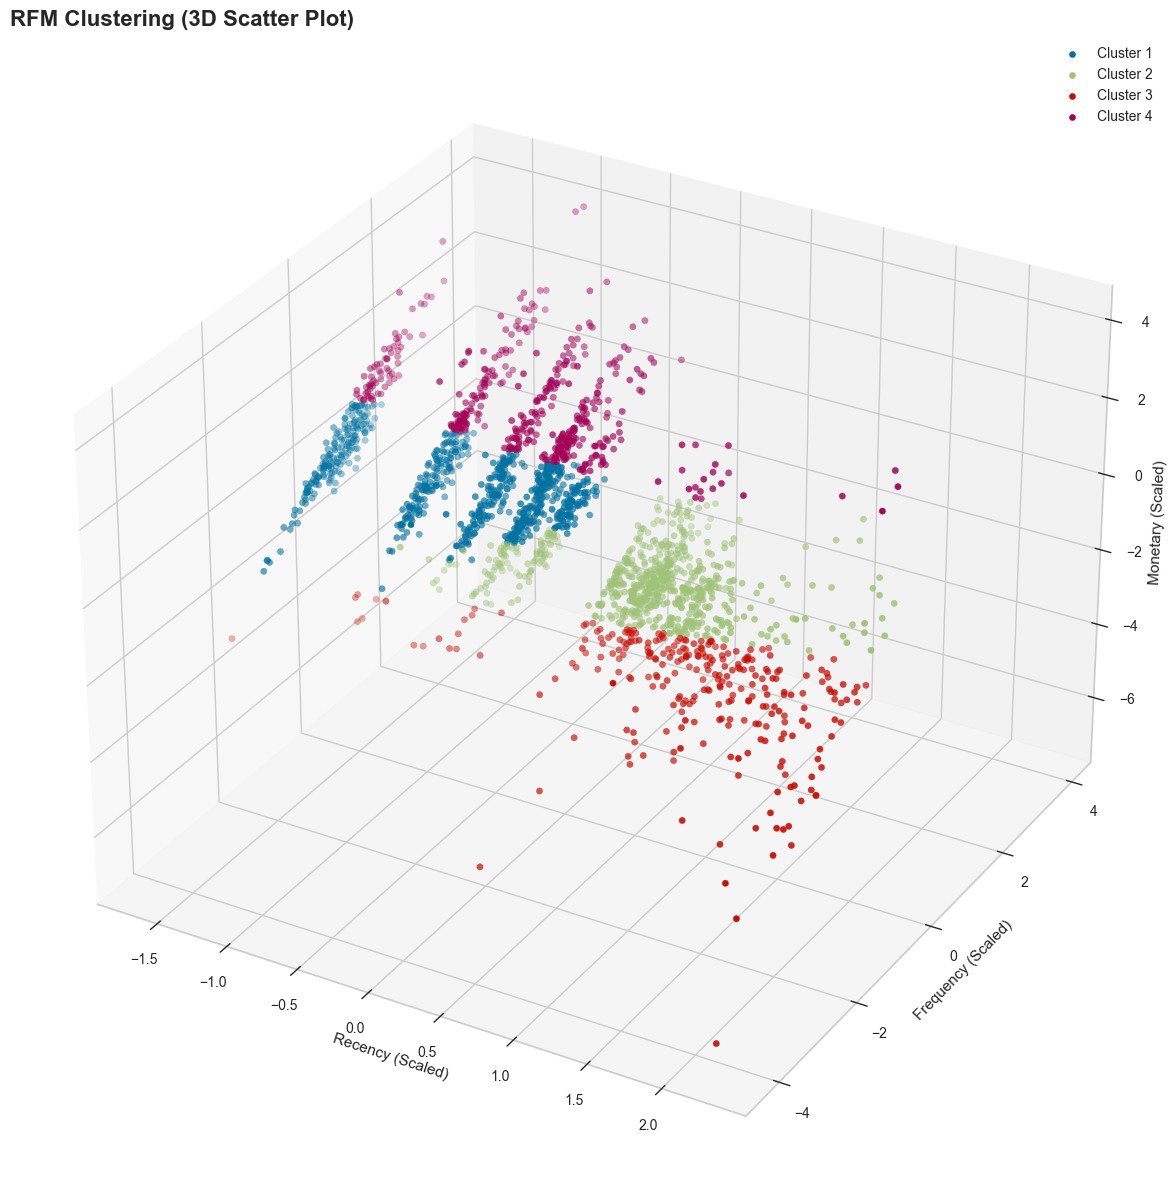

In [28]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=42)
kmeans = kmeans.fit(rfm_scaler)
clusters = kmeans.predict(rfm_scaler)
rfm_scaler['Cluster'] = clusters

# Visualize with 3D graph by Recency, Frequency and Monetary
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_data = rfm_scaler[rfm_scaler['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i+1}')

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()


`Comment:`  
- The four clusters are relatively well-separated.    
- The data mixing ratio between clusters is quite low.  

In [29]:
rfm_scaler

,Recency,Frequency,Monetary,Cluster
0,-0.961115,1.420018,1.825576,3
1,-0.961115,1.404591,2.309558,3
2,-0.961115,3.966642,4.046363,3
3,-0.538735,2.177075,2.254542,3
4,-0.023128,1.495515,1.058747,3
...,...,...,...,...
2082,0.514003,-2.432558,-1.695850,2
2083,1.045474,-1.478118,-1.482333,2
2084,-0.023128,-1.990052,-1.685784,2
2085,-1.649262,-2.456497,-2.616415,2


In [30]:
# Check Cluster Centers
kmeans.cluster_centers_

array([[-0.77676806,  0.15965463,  0.08118227],
       [ 0.70004983, -0.40417793, -0.38061165],
       [ 1.29544358, -1.52794598, -1.47969217],
       [-0.62331526,  1.31814583,  1.37809757]])

In [31]:
# Create Cluster featue for rfm data
rfm['Cluster'] = clusters
rfm.sample(20)

,Store Number,Recency,Frequency,Monetary,Cluster
44,2550,5,1500,250192.25,3
70,2587,3,4222,966894.46,3
642,4605,2,691,50154.49,0
1448,5840,12,340,48517.80,1
1179,5514,5,3388,740163.29,3
1339,5721,13,187,21019.86,2
184,2837,13,213,39016.34,1
478,4310,4,1304,176592.06,0
731,4738,11,808,93299.78,1
276,3738,5,340,57265.75,1


In [32]:
# Calculate mean score clusters for each feature
rfm_clusters = rfm.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(0)

rfm_clusters

,Recency,Frequency,Monetary
Cluster,,,
0,4.0,953.0,105752.0
1,18.0,502.0,57858.0
2,69.0,128.0,16428.0
3,5.0,3573.0,739590.0


`Visualize with 3D graph by Recency, Frequency and Monetary for main data (rfm dataframe)`

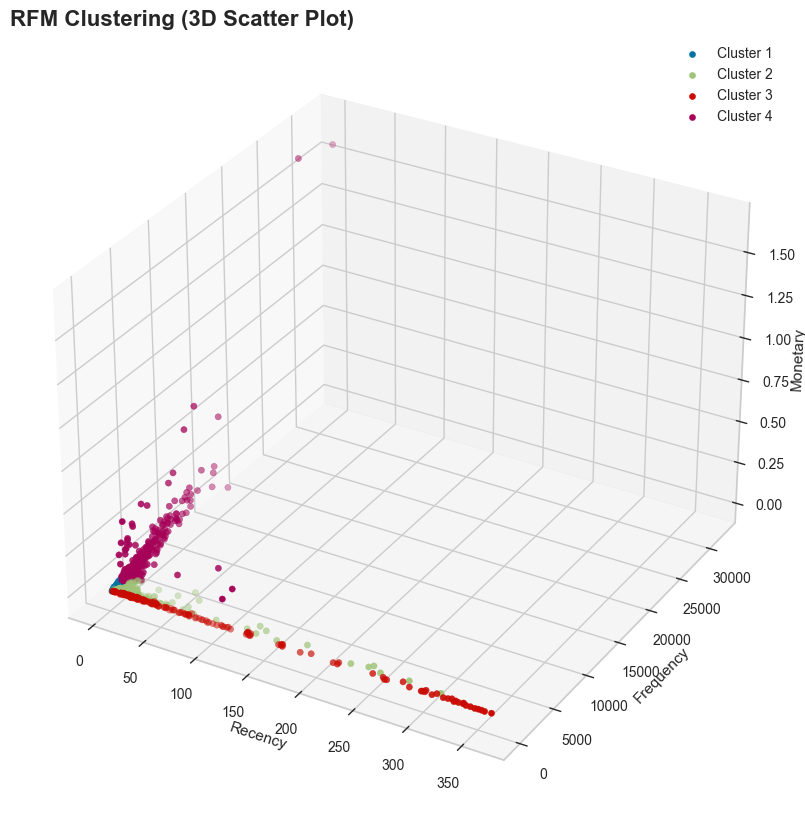

In [33]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
k = 4

for i in range(k):
    cluster_data = rfm[rfm['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i+1}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()


### Summary About RFM After Clustering Customer

`How many customers for each clusters?`

In [34]:
# Create number for each cluster dataframe
cluster_df = rfm['Cluster'].value_counts().to_frame().reset_index()
cluster_df.columns = ['Cluster', 'Number']
cluster_df

,Cluster,Number
0,0,708
1,1,659
2,3,441
3,2,279


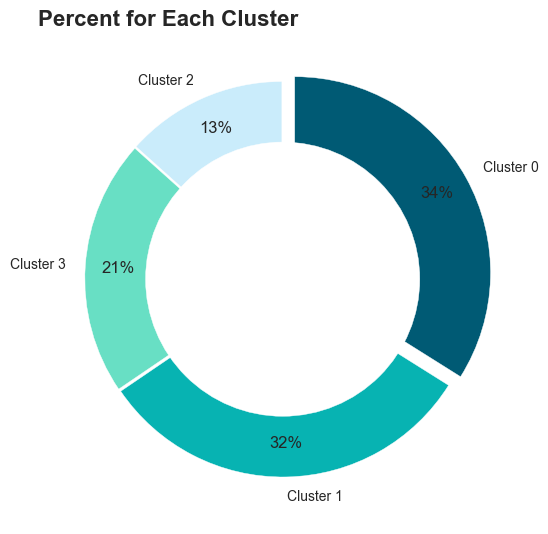

In [35]:
# Sort values by Number feature
cluster_df.sort_values(by = 'Number', ascending= True, inplace= True)
# Reset index df
cluster_df.reset_index(drop = True, inplace = True)

# Create pie chart to show percent for each cluster
labels = [('Cluster ' + str(cluster_df['Cluster'][x])) for x in range(len(cluster_df))]
explode = [0.01, 0.01, 0.01, 0.07]
plt.pie(cluster_df['Number'],
        labels = labels,
        autopct = '%1.0f%%',
        startangle = 90,
        explode= explode,
        pctdistance=0.83,
        colors = RFM_color
       )
# plt.axis('equal')
plt.title('Percent for Each Cluster', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show();

`Comment:`  
- After using the Kmeans algorithm to cluster customers into 4 groups, we can see that Cluster 0 and 1 account for 66% of the total number of customers. Specifically, Cluster 0 has the highest proportion at 34%, equivalent to 708 customers.  
- Let's proceed to examine the detailed characteristics of each Cluster to assign appropriate labels to customer groups.



`View Customers Group Data Distribution`

In [36]:
# Create function to show histogram chart for each feature in RFM dataframe
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            sb.histplot(dataframe[dataframe['Cluster'] == cluster][feature], ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

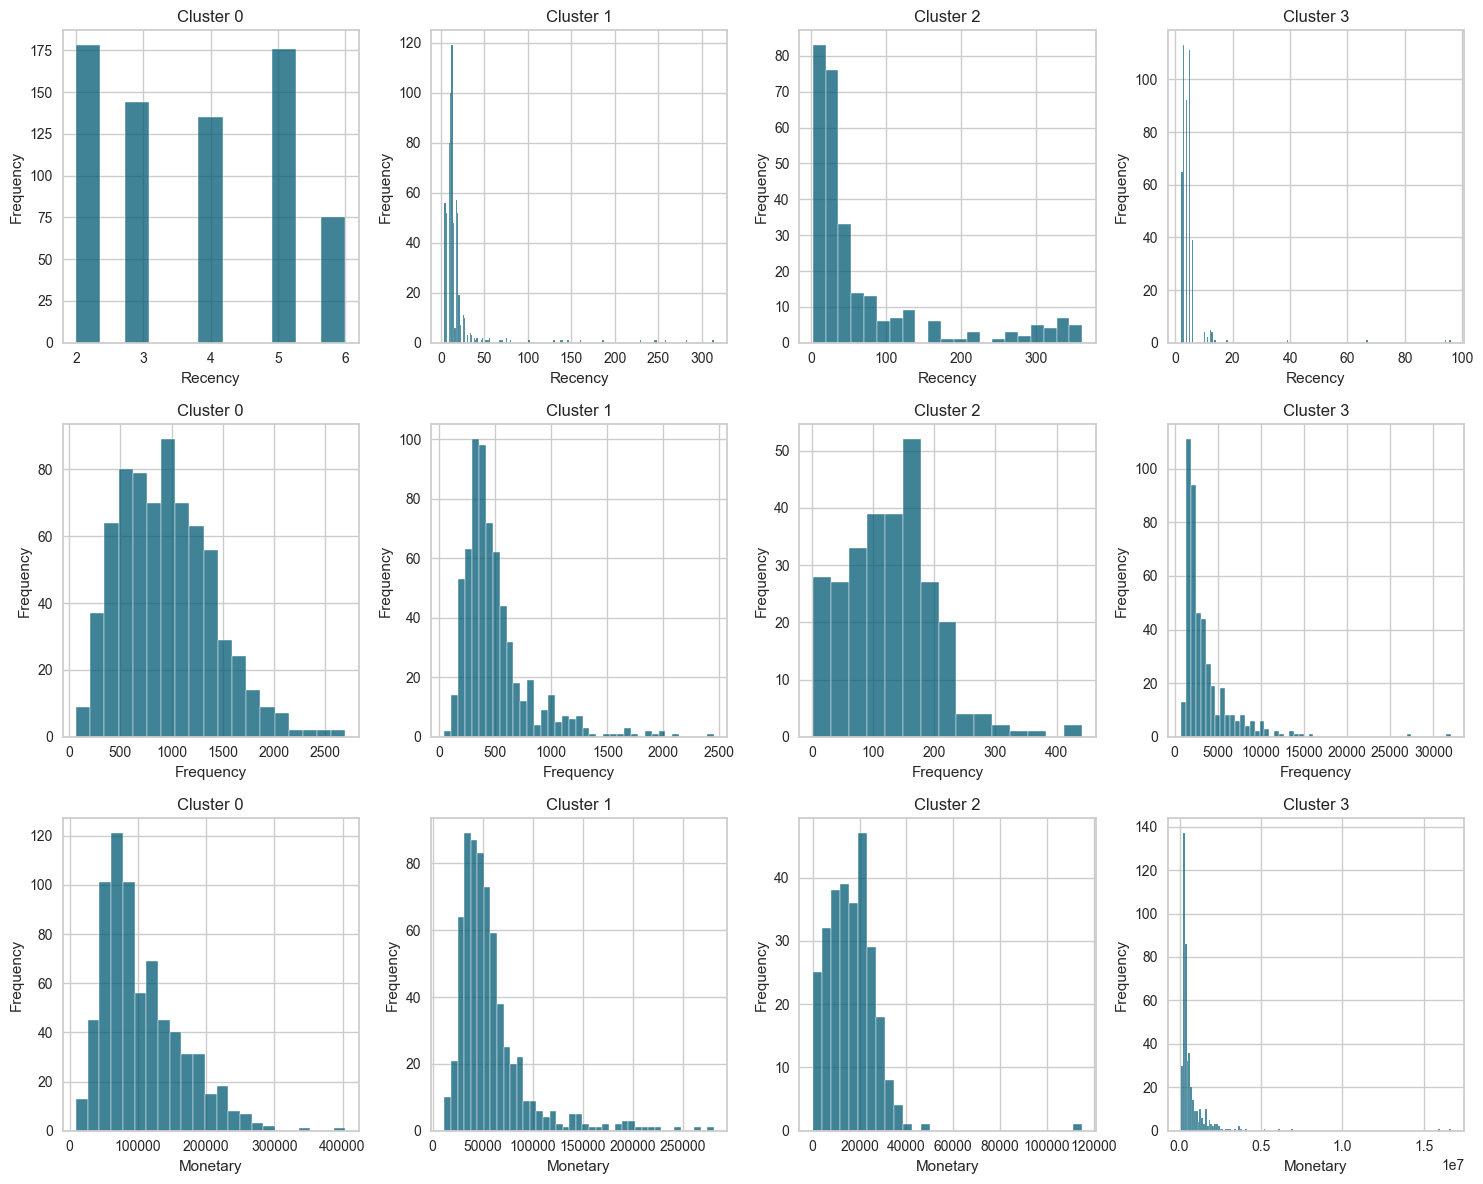

In [37]:
plot_cluster_histplots(rfm)

`Comment:`  
- By retaining the outliers from the beginning, it can be observed through some histogram plots that the data is concentrated in one range, with some points (with a relatively small proportion of data) extending far from the rest of the points (these are the outliers of each histogram that we are observing).  
- To make reading numbers and drawing conclusions through visual charts easier, we will use 90% of the data for observation.

In [38]:
# Create function to show histogram chart for each feature in RFM dataframe when using 90% data
def plot_cluster_histplots(dataframe):
    features = ['Recency', 'Frequency', 'Monetary']
    clusters = sorted(dataframe['Cluster'].unique())
    num_rows = len(features)
    num_cols = len(clusters)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, feature in enumerate(features):
        for j, cluster in enumerate(clusters):
            # Calculate 90 percentiles for the feature in the current cluster
            quantile_90 = dataframe[dataframe['Cluster'] == cluster][feature].quantile(0.9)
            sb.histplot(dataframe[(dataframe['Cluster'] == cluster) & 
                        (dataframe[feature] <= quantile_90)][feature], 
                         ax=axes[i, j], kde=False, color= "#005A74")
            axes[i, j].set_title(f'Cluster {cluster}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')


    plt.tight_layout()
    plt.show()

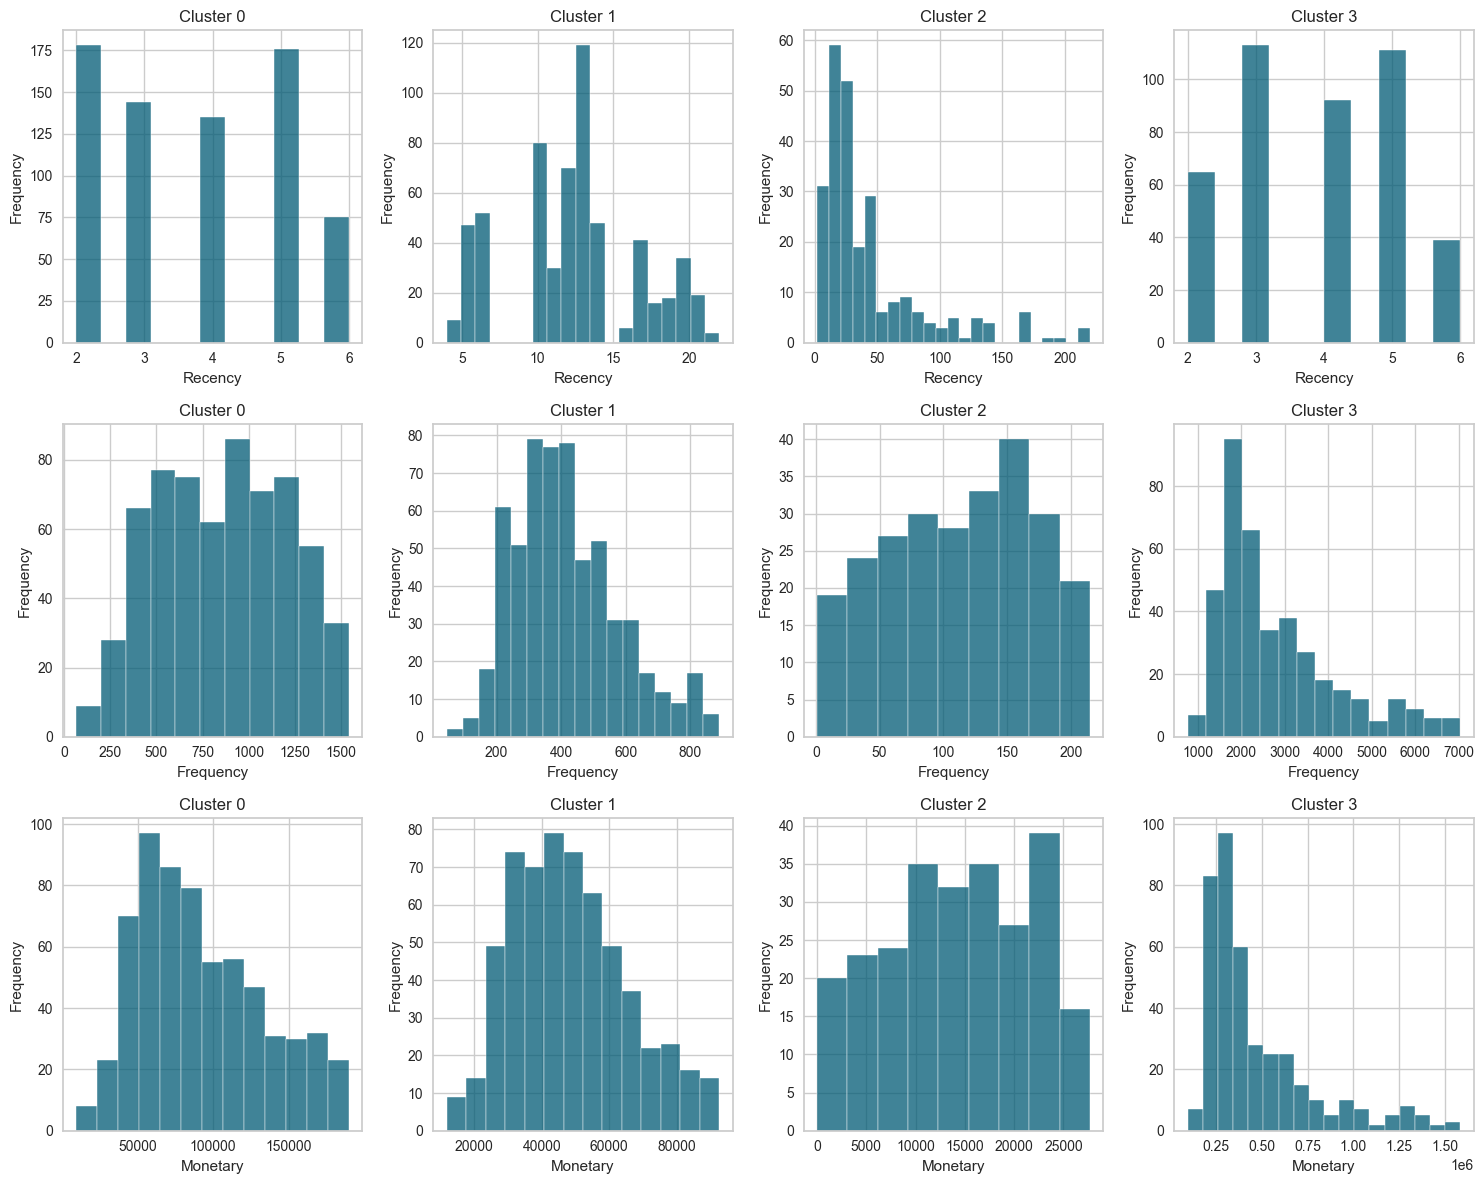

In [39]:
plot_cluster_histplots(rfm)

In [40]:
rfm_clusters

,Recency,Frequency,Monetary
Cluster,,,
0,4.0,953.0,105752.0
1,18.0,502.0,57858.0
2,69.0,128.0,16428.0
3,5.0,3573.0,739590.0


In [41]:
for i in ['Recency', 'Frequency', 'Monetary']:
    print(i,'Average:',round(rfm[i].mean(),0))

Recency Average: 17.0
Frequency Average: 1254.0
Monetary Average: 212623.0


## **3. Conclusion:**    
By using 90% of the data for observation, we now observe that the histogram plots better depict the distribution of the data. Combined with the Cluster Centers, we will label each customer segment and propose solutions for the following issues:  

### Cluster 0:  

`Summary:`  
- Recency: The average time since the last purchase is 4 days. The time ranges from 2 to 6 days at a particular store. (Regularly)  
- Frequency: The average frequency of purchases is 953 orders per year. The number of orders ranges from 250 to 1,500 orders at a particular store. (On average)    
- Monetary: The average expenditure is 105,752 (Dollars). The expenditure ranges from 50,000 to 150,000 (Dollars). (On average)    


`Potential Loyalist:` As a potential loyal customer group, these are individuals who have made recent purchases, but their quantity and value of orders are only at average levels.    


`Problem:`  How can we increase the value of their shopping cart with each purchase?    
- Offer free gifts for transactions above the brand's average value.
- Upsell high-value products.
- Seek feedback and implement campaigns to enhance engagement.




### Cluster 1:  

`Summary:`  
- Recency: The average time since the last purchase is 18 days. The time ranges from 5 to 20 days (with a maximum of 13 days) at a particular store. (Average)  
- Frequency: The average frequency of purchases is 502 orders per year. The number of orders ranges from 200 to 800 orders at a particular store. (Low)  
- Monetary: The average expenditure is 57,858 (Dollars). The expenditure ranges from 20,000 to 80,000 (Dollars). (Low)  


`Need Attention:` This group of customers purchases infrequently, with relatively low quantity and value of orders.  


`Problem:` What causes their dissatisfaction and infrequent purchases?  
- Offer limited-time special promotions.  
- Provide recommendations based on their previous purchases.  
- Additionally, analyze their shopping cart history to identify any product-related factors contributing to their dissatisfaction.  

### Cluster 2:  

`Summary:`  
- Recency: The average time since the last purchase is 69 days. The time ranges from 10 to over 200 days at a particular store. (Quite long)  
- Frequency: The average frequency of purchases is 128 orders per year. The number of orders ranges from 50 to 200 orders at a particular store. (Very Low)  
- Monetary: The average expenditure is 16,428 (Dollars). The expenditure ranges from 5,000 to 25,000 (Dollars). (Very Low)  


`Lost:` This group of customers has not returned for a long time, with very low purchase frequency and basket size.  


`Problem:` How can we bring them back for repeat purchases and increase their frequency of buying?  
- Reconnect with these customers through various means such as emails, direct interactions via social media, or phone calls.  
- Implement retargeting campaigns, short-term promotional programs with forms of vouchers, discounts, exclusive offers, etc.  
- Offer free trial policies to encourage them to return and make purchases.  

### Cluster 3: 

`Summary:`
- Recency: The average time since the last purchase is 5 days. The time ranges from 2 to 6 days at a particular store. (Frequent)  
- Frequency: The average frequency of purchases is 3,573 orders per year. The number of orders ranges from 1,000 to 7,000 (with a maximum of 2,000) orders at a particular store. (Very High)  
- Monetary: The average expenditure is 739,590 (Dollars). The expenditure ranges from 250,000 to 1,500,000 (Dollars). (Very High)


`Champions:` These are new customers who transact frequently and spend the most. They are highly loyal, generous spenders, and likely to make another purchase soon.  

`Problem:` How can we retain these customers by any means necessary?    
- Offer them privileges such as special discounts or early access to new products.  
- Attract them with exclusive promotional discount programs.  
- Encourage them to participate in loyalty programs to receive more benefits from their shopping.  

## **4. Transform Cluster to Segment data and Export file**

### Transform & Merge data

In [42]:
rfm_clusters.reset_index(inplace = True)
rfm_clusters

,Cluster,Recency,Frequency,Monetary
0,0,4.0,953.0,105752.0
1,1,18.0,502.0,57858.0
2,2,69.0,128.0,16428.0
3,3,5.0,3573.0,739590.0


In [43]:
# Transform from Cluster to Segment name
rfm['Cluster'] = rfm['Cluster'].replace(0, 'Potential Loyalist')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(0, 'Potential Loyalist')

rfm['Cluster'] = rfm['Cluster'].replace(1, 'Need Attention')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(1, 'Need Attention')

rfm['Cluster'] = rfm['Cluster'].replace(2, 'Lost')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(2, 'Lost')

rfm['Cluster'] = rfm['Cluster'].replace(3, 'Champions')
rfm_clusters['Cluster'] = rfm_clusters['Cluster'].replace(3, 'Champions')

# Rename Cluster column to Segment column
rfm = rfm.rename(columns = {'Cluster' : 'Segment'})
rfm_clusters = rfm_clusters.rename(columns = {'Cluster' : 'Segment'})

# Check rfm dataframe when transform
rfm

,Store Number,Recency,Frequency,Monetary,Segment
0,2106,3,3261,860027.88,Champions
1,2130,3,3211,1615285.89,Champions
2,2190,3,32002,15959622.42,Champions
3,2191,4,6779,1503342.17,Champions
4,2200,6,3516,319026.44,Champions
...,...,...,...,...,...
2082,10313,10,27,9692.60,Lost
2083,10314,19,110,12660.03,Lost
2084,10315,6,53,9815.29,Lost
2085,10316,2,26,3085.87,Lost


In [44]:
rfm['Segment'].value_counts()

Potential Loyalist    708
Need Attention        659
Champions             441
Lost                  279
Name: Segment, dtype: int64

In [45]:
rfm_clusters

,Segment,Recency,Frequency,Monetary
0,Potential Loyalist,4.0,953.0,105752.0
1,Need Attention,18.0,502.0,57858.0
2,Lost,69.0,128.0,16428.0
3,Champions,5.0,3573.0,739590.0


In [46]:
# Merge Segment column from rfm dataframe in data df
data = data.merge(rfm[['Store Number', 'Segment']], on = 'Store Number')

# Test sample data in dataframe 
data.sample(5)

,Invoice Number,Order Date,Store Number,Store Name,County,Category Name,Vendor Name,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Longitude,Store Latitude,Segment
1072417,INV-64550700009,2023-11-22,3873,TARGET STORE T-1113 / CORALVILLE,JOHNSON,AMERICAN VODKAS,FIFTH GENERATION INC,TITOS HANDMADE VODKA 750.0 (ml),12,750.0,10.0,15.0,12,180.0,9.00,-91.60845,41.69072,Potential Loyalist
675014,INV-64719700043,2023-11-28,6173,MINI-MART / INDEPENDENCE,BUCHANAN,IMPORTED SCHNAPPS,SAZERAC COMPANY INC,DR MCGILLICUDDYS PEACH MINI 50.0 (ml),12,50.0,5.0,7.5,1,7.5,0.05,-91.90183,42.46863,Champions
1714889,INV-55937000019,2023-02-16,2652,HY-VEE DRUGSTORE / MASON CITY,CERRO GORDO,AMERICAN VODKAS,FIFTH GENERATION INC,TITOS HANDMADE VODKA MINI 50.0 (ml),5,50.0,12.8,19.2,10,192.0,0.50,-93.21409,43.1483,Champions
1245965,INV-59248300077,2023-06-09,4169,SUPER QUICK 2 / HUBBELL,POLK,AMERICAN BRANDIES,HEAVEN HILL BRANDS,CHRISTIAN BROS BRANDY 750.0 (ml),12,750.0,6.0,9.0,3,27.0,2.25,-93.58652,41.59604,Champions
1186801,INV-55282200077,2023-01-25,2590,HY-VEE FOOD STORE #5 / CEDAR RAPIDS,LINN,IMPORTED CORDIALS & LIQUEURS,BACARDI USA INC,ST GERMAIN 750.0 (ml),6,750.0,20.0,30.0,6,180.0,4.50,-91.65818,42.01089,Champions


In [47]:
# Check nunique data Segment using group by Store Number
data.groupby('Segment')['Store Number'].nunique()

Segment
Champions             441
Lost                  279
Need Attention        659
Potential Loyalist    708
Name: Store Number, dtype: int64

### Export data necessary to analyze

In [48]:
data.to_csv('data_cleaned/Iowa_Liquor_Analyze.csv', index = False)

In [49]:
# Read Customer data
customer = pd.read_csv('data_cleaned/Iowa_Liquor_Customer.csv')

# Add Segment data in Customer data
customer = customer.merge(rfm[['Store Number', 'Segment']], on = 'Store Number')

# Export new Customer data
customer.to_csv('data_cleaned/Iowa_Liquor_Customer.csv', index = False)

# Check info
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store Number     2087 non-null   int64  
 1   Store Name       2087 non-null   object 
 2   Address          2087 non-null   object 
 3   County           2087 non-null   object 
 4   Store Longitude  2087 non-null   float64
 5   Store Latitude   2087 non-null   float64
 6   Segment_x        2087 non-null   object 
 7   Segment_y        2087 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 146.7+ KB


In [50]:
rfm_clusters.to_csv('data_cleaned/Iowa_Liquor_RFMcluster.csv', index = False)
rfm_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Segment    4 non-null      object 
 1   Recency    4 non-null      float64
 2   Frequency  4 non-null      float64
 3   Monetary   4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes
